C:\Users\hp\AppData\Local\Temp\ipykernel_17756\3389625739.py:19: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
C:\Users\hp\AppData\Local\Temp\ipykernel_17756\3389625739.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(['year','sex'], group_keys=False).apply(add_prop) ### 여기가 변경되었어요 ###
C:\Users\hp\AppData\Local\Temp\ipykernel_17756\3389625739.py:36: DeprecationWarning: DataFrameGroupBy.apply operated 

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2020,0.737827,0.822350
2021,0.736296,0.818755
2022,0.732429,0.813301


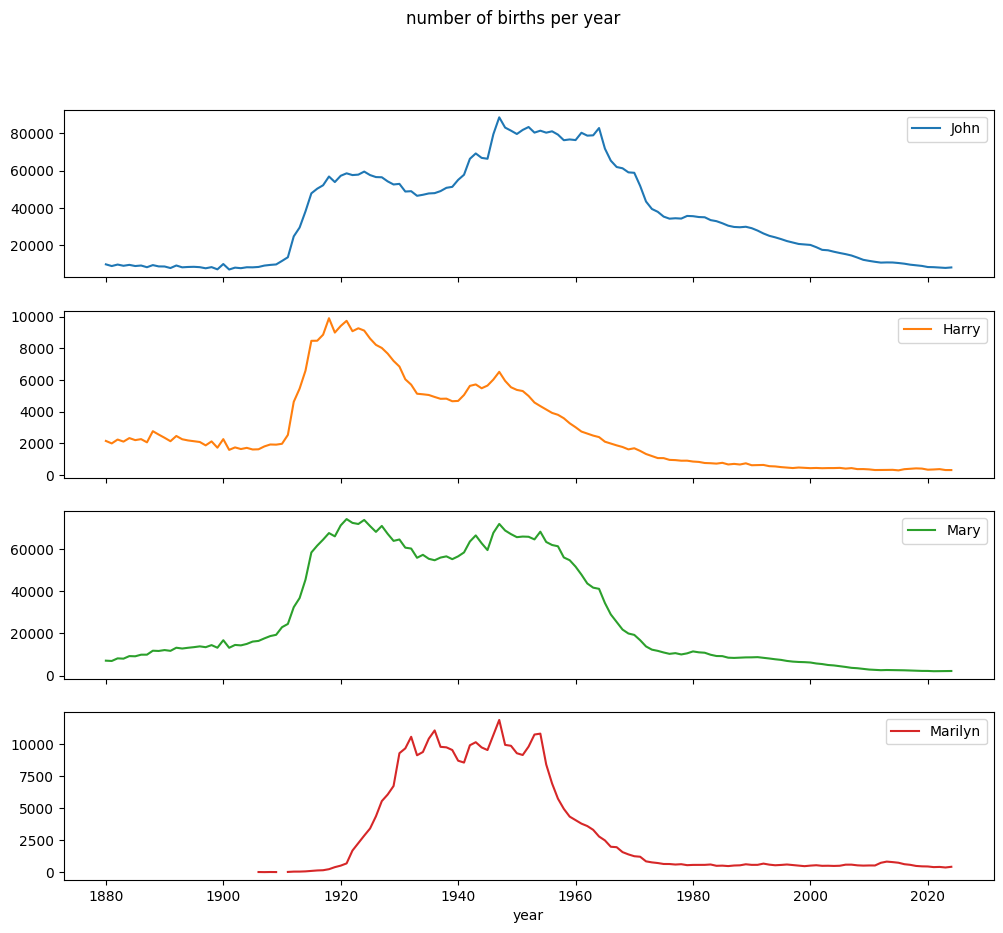

In [3]:
# 미국 신생아 이름
import pandas as pd

# names = ['name','sex','births']
# names2024 = pd.read_csv('babynames/yob2024.txt', names=names)
# names2024.groupby('sex')['births'].sum()
pieces = []
for year in range(1880, 2025):
    path = f'babynames/yob{year}.txt'
    frame = pd.read_csv(path, names=['name','sex','births'])
    
    frame['year'] = year
    pieces.append(frame)

# 위 names와 이름이 겹치니 조심하세요.
names = pd.concat(pieces, ignore_index=True)

# 579
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
#total_births.tail()

# prop 열 추가, 전체 출생 수에서 차지하는 각 이름의 비율 계산하기 580p
def add_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

names = names.groupby(['year','sex'], group_keys=False).apply(add_prop) ### 여기가 변경되었어요 ###
names.groupby(['year','sex'])['prop'].sum() ### 여기가 변경되었어요 ###

# 581
# 각 연도별 가장 많은 이름
def get_top1000(group):
    return group.sort_values('births', ascending=False)[:1000]

grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000 = top1000.reset_index(drop=True)

# 2025-05-26
# 데이터 분석을 위한 텍스트 마이닝 구축 실습 (~6/16)
# 582 13.3.1 - 이름 유행 분석
# 이번주만 잘 버텨주시면 다음주는 쉬는 날이 많아요.    (6/3 선거, 6/6 현충일)

boys = top1000[top1000['sex'] == 'M']
girls = top1000[top1000['sex'] == 'F']
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

# total_births
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True, figsize=(12,10), title='number of births per year')

names
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table

<Axes: xlabel='year'>

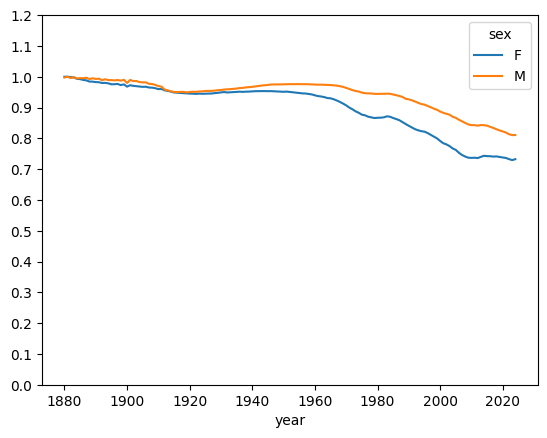

In [4]:
import numpy as np
table.plot(yticks=np.linspace(0,1.2,13))

In [11]:
df = boys[boys['year'] == 2024]
prop_cumsum = df['prop'].sort_values(ascending=False).cumsum()
prop_cumsum[:10]
prop_cumsum.searchsorted(0.5)

np.int64(177)

C:\Users\hp\AppData\Local\Temp\ipykernel_17756\4036982358.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)


<Axes: xlabel='year'>

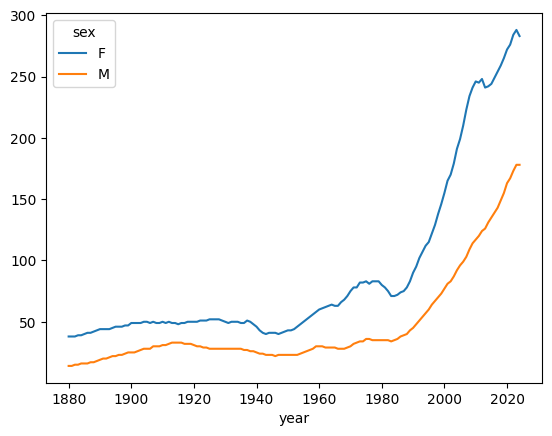

In [12]:
# 연도별 이름의 수 증가 그래프 586
def get_quantile_count(group, q=0.5):
    group = group.sort_values('prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack()

diversity.plot()